In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import svd
from functions import *
from get_estimated_covariance import *
import scipy.stats
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd
import tensorflow as tf
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sns.set()
sns.set_context('paper')

# 2.1 

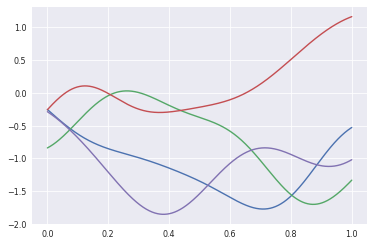

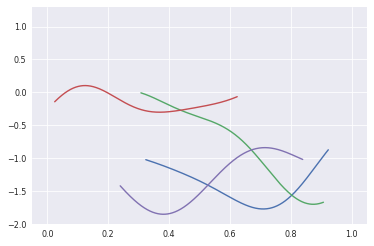

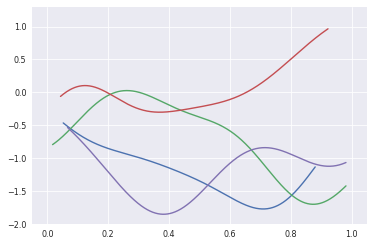

In [216]:
n = 1000
t = np.linspace(0,1,n)
ma = np.meshgrid(t,t)
bla = np.exp(-(ma[0]-ma[1])**2/0.1)
A = np.minimum(ma[0],ma[1])
A = A[1:,1:]
np.random.seed(7)
data = np.random.multivariate_normal(np.zeros(n),bla,10)
for _ in range(4):
    plt.plot(t,data[_])
plt.savefig('images/21/full.png',bbox_inches='tight', pad_inches=0)
plt.show()
np.random.seed(339128)
for _ in range(4):
    s = np.random.randint(0,400)
    plt.plot(t[s:s+600],data[_,s:s+600])
plt.plot(t, 1000 * np.ones(n))
plt.ylim(-2,1.3)
plt.savefig('images/21/frags.png',bbox_inches='tight', pad_inches=0)
plt.show()
for _ in range(4):
    delt = np.random.randint(800,1000)
    s = np.random.randint(0,1000-delt)
    plt.plot(t[s:s+delt],data[_,s:s+delt])
plt.plot(t, 1000 * np.ones(n))
plt.ylim(-2,1.3)
plt.savefig('images/21/blanket.png',bbox_inches='tight', pad_inches=0)
plt.show()


# 2.2 

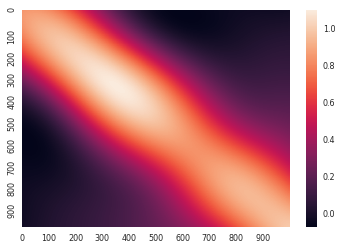

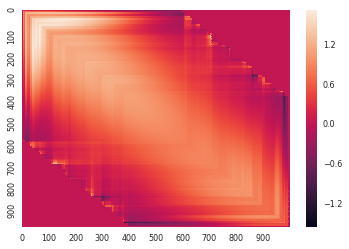

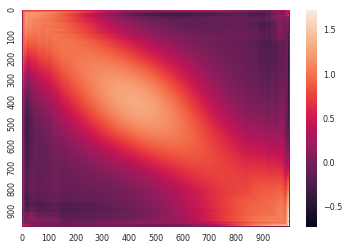

In [215]:
n=1000
K=100
data = np.random.multivariate_normal(np.zeros(n),bla,K)
bounds1 = np.random.randint(0,400,K);bounds1 = np.c_[bounds1,bounds1+600]
delt = np.random.randint(800,1000,K); s = np.array([np.random.randint(0,1000-delt[i]) for i in range(K)]); bounds2 = np.c_[s,s+delt]
#A = get_trunc_cov(data,bounds1)
#B = get_trunc_cov(data,bounds2)
ax1 = sns.heatmap(np.cov(data,rowvar=False),xticklabels=100,yticklabels=100)
fig1 = ax1.get_figure()
#fig1.savefig('images/22/truecov.png',bbox_inches='tight', pad_inches=0)
plt.show()
ax2 = sns.heatmap(A,xticklabels=100,yticklabels=100)
fig2 = ax2.get_figure()
#fig2.savefig('images/22/fragsheat.png',bbox_inches='tight', pad_inches=0)
plt.show()
ax3 = sns.heatmap(B,xticklabels=100,yticklabels=100)
fig3 = ax3.get_figure()
#fig3.savefig('images/22/blanketheat.png',bbox_inches='tight', pad_inches=0)
plt.show()

# 2.3 

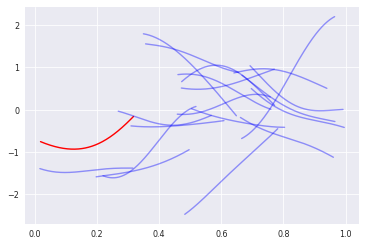

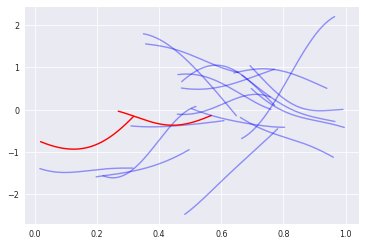

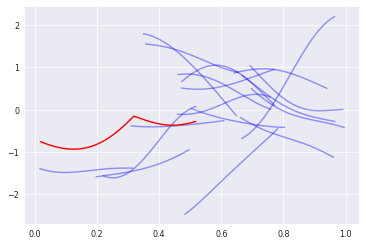

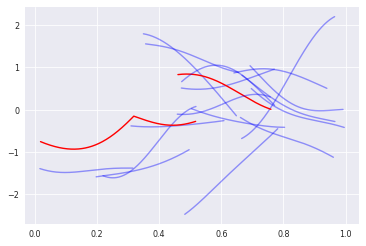

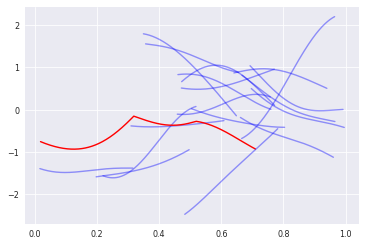

In [300]:
n=1000
K=20
np.random.seed(2)
data = np.random.multivariate_normal(np.zeros(n),bla,K)
bds = np.random.randint(0,700,K);bds = np.c_[bds,bds+300]
t = np.linspace(0,1,n)
for _ in range(K):
    s,st = bds[_,0],bds[_,1]
    if _!=4:
        plt.plot(t[s:st],data[_,s:st],'b',alpha=0.4)
    else:
        plt.plot(t[s:st],data[_,s:st],'r',alpha=1)
#plt.savefig('images/23/step1.png',bbox_inches='tight', pad_inches=0)
plt.show()

for _ in range(K):
    s,st = bds[_,0],bds[_,1]
    if _ not in [4,9]:
        plt.plot(t[s:st],data[_,s:st],'b',alpha=0.4)
    else:
        plt.plot(t[s:st],data[_,s:st],'r',alpha=1)
#plt.savefig('images/23/step2.png',bbox_inches='tight', pad_inches=0)
plt.show()

for _ in range(K):
    s,st = bds[_,0],bds[_,1]
    if _ not in [4,9]:
        plt.plot(t[s:st],data[_,s:st],'b',alpha=0.4)
    elif _== 4:
        st1 = bds[9,1]-50
        plt.plot(t[s:st1],np.append(data[_,s:st],data[9,st:st1] + (data[_,st]-data[9,st])),'r',alpha=1)
#plt.savefig('images/23/step3.png',bbox_inches='tight', pad_inches=0)
plt.show()

for _ in range(K):
    s,st = bds[_,0],bds[_,1]
    if _ not in [4,10,9]:
        plt.plot(t[s:st],data[_,s:st],'b',alpha=0.4)
    elif _== 4:
        st1 = bds[9,1]-50
        plt.plot(t[s:st1],np.append(data[_,s:st],data[9,st:st1] + (data[_,st]-data[9,st])),'r',alpha=1)
    elif _==10:
        plt.plot(t[s:st],data[_,s:st],'r',alpha=1)
#plt.savefig('images/23/step4.png',bbox_inches='tight', pad_inches=0)
plt.show()

for _ in range(K):
    s,st = bds[_,0],bds[_,1]
    if _ not in [4,9]:
        plt.plot(t[s:st],data[_,s:st],'b',alpha=0.4)
    elif _== 4:
        st1 = bds[9,1]-50
        st2 = bds[10,1]-50
        want = np.append(np.append(data[_,s:st],data[9,st:st1] + (data[_,st]-data[9,st])),\
                         data[10,st1:st2] + (data[9,st1]+data[_,st]-data[9,st]-data[10,st1]))
        plt.plot(t[s:st2],want,'r',alpha=1)
#plt.savefig('images/23/step5.png',bbox_inches='tight', pad_inches=0)
plt.show()

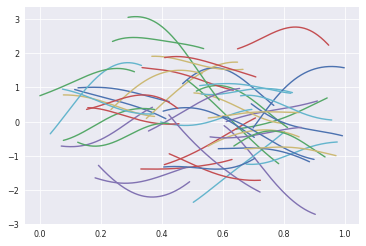

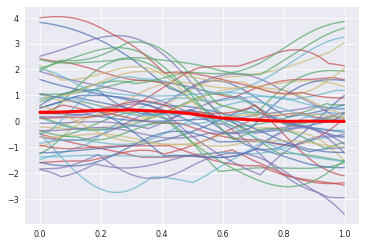

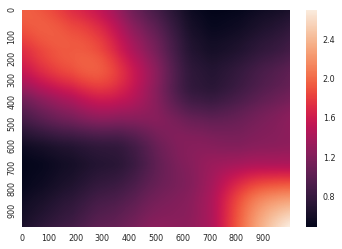

In [639]:
n=1000
K=50
np.random.seed(2)
data = np.random.multivariate_normal(np.zeros(n),bla,K)
bds = np.random.randint(0,700,K);bds = np.c_[bds,bds+300]
bds[np.argmin(bds,0)[0],0]=0;bds[np.argmax(bds,0)[0],1]=n-1
t = np.linspace(0,1,n)
for _ in range(K):
    s,st = bds[_,0],bds[_,1]
    plt.plot(t[s:st],data[_,s:st],alpha=1)
#plt.savefig('images/23/frags.png',bbox_inches='tight', pad_inches=0)
plt.show()

def extend_to_the_right(data,aux):
    newdata = []
    for i in range(K):
        s,st = bds[i,0],bds[i,1]
        cap = True
        while cap:
            j = np.random.randint(0,K)
            if bds[j,0]<st and bds[j,0]>=s:
                cap = False
        s1,st1 = bds[j,0],bds[j,1]
        bds[i,1] = st1
        newdata.append(np.append(aux[i],data[j][st:st1] + (aux[i][-1]-data[j][st])))
    return newdata

def extend_to_the_left(data,aux):
    newdata = []
    for i in range(K):
        s,st = bds[i,0],bds[i,1]
        cap = True
        while cap:
            j = np.random.randint(0,K)
            if bds[j,0]<=s and bds[j,1]>=s:
                cap = False
        s1,st1 = bds[j,0],bds[j,1]
        bds[i,0] = s1
        newdata.append(np.append(data[j][s1:s] + (aux[i][0]-data[j][s]), aux[i]))
    return newdata

aux = [data[i,bds[i,0]:bds[i,1]] for i in range(K)]

for it in range(100):
    aux = extend_to_the_right(data, aux)

for it in range(100):
    aux = extend_to_the_left(data, aux)

final = np.zeros((K,n-1))
for i in range(K):
    s,st = bds[i,0],bds[i,1]
    final[i] = aux[i][:st-s]
for i in range(K):
    s,st = bds[i,0],bds[i,1]
    plt.plot(t[s:st],final[i,:(st-s)],alpha=0.7)
plt.plot(t[:-1],final.mean(0),'r',alpha=1, linewidth=3)
#plt.savefig('images/23/extended.png',bbox_inches='tight', pad_inches=0)
plt.show()

cov = np.cov(final,rowvar=False)
ax = sns.heatmap(cov,xticklabels=100,yticklabels=100)
fig = ax.get_figure()
#fig.savefig('images/23/cov.png',bbox_inches='tight', pad_inches=0)

# 2.4 

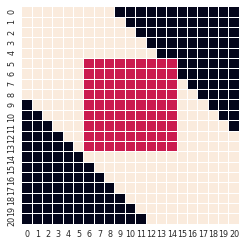

In [21]:
A = np.zeros((21,21))
sns.heatmap(A,linewidths=.01,square=True,cbar=False)
for i in range(21):
    for j in range(21):
        if abs(i-j) < 9:
            A[i,j]=1
sns.heatmap(A,linewidths=.01,square=True,cbar=False)
for i in range(5,14):
    for j in range(6,15):
        A[i,j] = 0.5
sns.heatmap(A,linewidths=.01,square=True,cbar=False)
#plt.savefig('images/24/matcomp.png',bbox_inches='tight', pad_inches=0)

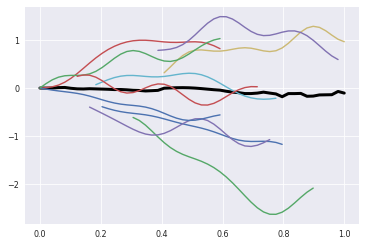

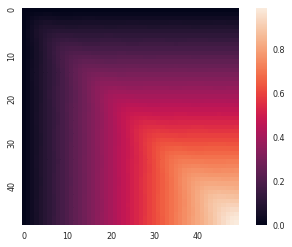

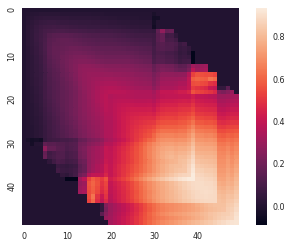

1
2
3
4
5
6
7
8
9
10


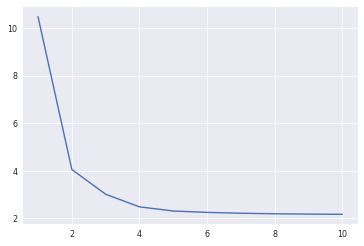

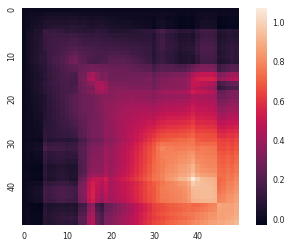

In [167]:
N = 50
t = np.linspace(0,1,N)
ma = np.meshgrid(t,t)
cov = np.minimum(ma[0],ma[1])
eigv, eigf = np.linalg.eigh(cov)
r = 10
rA = eigf[:,-r:] @ np.diag(eigv[-r:]) @ eigf[:,-r:].T
sqrtrA = eigf[:,-r:] @ np.diag(np.sqrt(eigv[-r:])) @ eigf[:,-r:].T

n=100
data = np.random.multivariate_normal(np.zeros(N),rA,n)

delta = 0.6
bounds, bounds2 = get_eff_bounds(delta=delta, N=N, n=n)

estmu = [hmu(data,i,bounds) for i in range(N)]

plt.plot(t,estmu,'k',linewidth=3)
for _ in range(10,20):
    s,st = bounds[_][0], bounds[_][1]
    plt.plot(t[s:st],data[_,s:st])
#plt.savefig('images/24/fragex.png',bbox_inches='tight', pad_inches=0)
plt.show()

trunc_cov = get_trunc_cov(data,bounds2)

sns.heatmap(rA, square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)
#plt.savefig('images/24/truecov.png',bbox_inches='tight', pad_inches=0)
plt.show()
sns.heatmap(trunc_cov, square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)
#plt.savefig('images/24/trunccov.png',bbox_inches='tight', pad_inches=0)
plt.show()

P = get_P(N,delta)
res = []
for i in range(1,r+1):
    print(i)
    tmp = dog(i,P,trunc_cov)[1].reshape((N,-1))
    est = tmp @ tmp.T
    res.append(est)

bla = [np.linalg.norm(P*res[i]-trunc_cov)**2 for i in range(r)]

plt.plot(np.arange(1,r+1),bla)
#plt.savefig('images/24/obvals.png',bbox_inches='tight', pad_inches=0)
plt.show()

sns.heatmap(res[4], square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)
#plt.savefig('images/24/estcov.png',bbox_inches='tight', pad_inches=0)
plt.show()

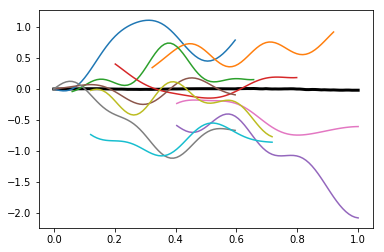

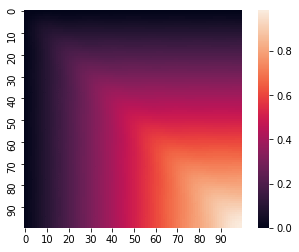

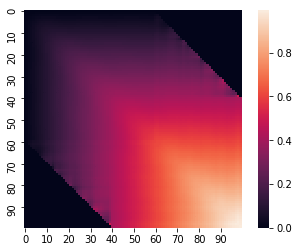

1
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.002538
  Number of iterations: 19
  Number of functions evaluations: 52
2
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000712
  Number of iterations: 39
  Number of functions evaluations: 53
3
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000523
  Number of iterations: 84
  Number of functions evaluations: 103
4
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000472
  Number of iterations: 98
  Number of functions evaluations: 121
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000460
  N

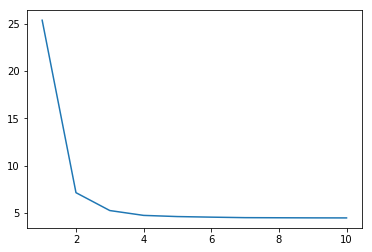

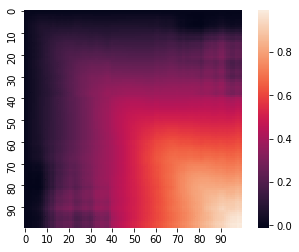

In [31]:
N = 100
t = np.linspace(0,1,N)
ma = np.meshgrid(t,t)
cov = np.minimum(ma[0],ma[1])
eigv, eigf = np.linalg.eigh(cov)
r = 10
rA = eigf[:,-r:] @ np.diag(eigv[-r:]) @ eigf[:,-r:].T
sqrtrA = eigf[:,-r:] @ np.diag(np.sqrt(eigv[-r:])) @ eigf[:,-r:].T

n=10000
data = np.random.multivariate_normal(np.zeros(N),rA,n)

delta = 0.6
bounds, bounds2 = get_eff_bounds(delta=delta, N=N, n=n)

estmu = [hmu(data,i,bounds) for i in range(N)]

plt.plot(t,estmu,'k',linewidth=3)
for _ in range(10,20):
    s,st = bounds[_][0], bounds[_][1]
    plt.plot(t[s:st],data[_,s:st])
#plt.savefig('images/24/fragex.png',bbox_inches='tight', pad_inches=0)
plt.show()

trunc_cov = get_trunc_cov(data,bounds2)

sns.heatmap(rA, square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)
#plt.savefig('images/24/truecov.png',bbox_inches='tight', pad_inches=0)
plt.show()
sns.heatmap(trunc_cov, square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)
#plt.savefig('images/24/trunccov.png',bbox_inches='tight', pad_inches=0)
plt.show()

svd = np.linalg.svd(trunc_cov)
P = get_P(N,delta)
res = []
def get_best_param(i):
    init_gamma = svd[0][:,:i] @ np.diag(svd[1][:i])

    tf.reset_default_graph()
    tf.set_random_seed(42)
    Rr = tf.constant(trunc_cov, dtype=tf.float32, name = "R")
    Pp = tf.constant(P, dtype = tf.float32, name = "P")
    in_gamma = tf.placeholder(dtype=tf.float32,shape = (N,i), name='ini')
    gamma = tf.Variable(in_gamma + tf.random_normal([N,i],0,1),dtype=tf.float32, name = "gamma")
    pred = tf.multiply(Pp,tf.matmul(gamma,gamma,transpose_b=True))
    error = Rr - pred
    mse = tf.reduce_mean(tf.square(error), name="mse")
    optimizer = tf.contrib.opt.ScipyOptimizerInterface(mse,options={'maxiter': 1000000, 'gtol':1e-50,'ftol':1e-50})
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init,feed_dict={in_gamma:init_gamma.astype(np.float32)})
        optimizer.minimize(sess)
        best_gamma = gamma.eval()
    return best_gamma @ best_gamma.T

for i in range(1,r+1):
    print(i)
    est = get_best_param(i)
    res.append(est)

bla = [np.linalg.norm(P*res[i]-trunc_cov)**2 for i in range(r)]

plt.plot(np.arange(1,r+1),bla)
#plt.savefig('images/24/obvals.png',bbox_inches='tight', pad_inches=0)
plt.show()

sns.heatmap(res[4], square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)
#plt.savefig('images/24/estcov.png',bbox_inches='tight', pad_inches=0)
plt.show()

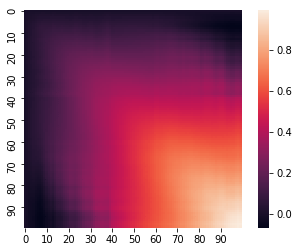

In [32]:
sns.heatmap(res[3], square=True,cbar_kws={"shrink": 1},xticklabels=10,yticklabels=10)

In [34]:
estcov = np.cov(data, rowvar=False)

In [33]:
np.linalg.norm(res[-1]-rA)/np.linalg.norm(rA)

0.025877117706105353

In [35]:
np.linalg.norm(estcov-rA)/np.linalg.norm(rA)

0.0064885017676761846

In [36]:
np.linalg.norm(trunc_cov-rA)/np.linalg.norm(rA)

0.16304987512293451

# 4.2 

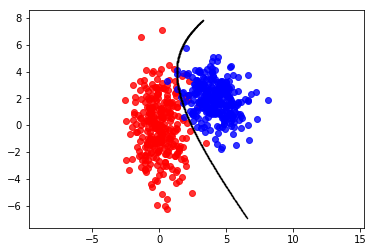

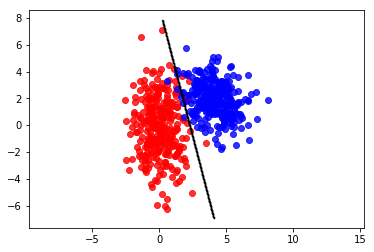

In [6]:
U = np.array([[np.sqrt(0.5),np.sqrt(0.5)],[-np.sqrt(0.5),np.sqrt(0.5)]])

cov1 = np.diag([1,5])
cov2 = U @ np.diag([2,1]) @ U.T
mu1 = np.zeros(2)
mu2 = np.array([4,2])

X1 = np.random.multivariate_normal(mu1, cov1, 300)
X2 = np.random.multivariate_normal(mu2, cov2, 300)

def disc(x):
    return np.log(np.linalg.det(cov1)) + (x-mu1) @ np.linalg.solve(cov1,(x-mu1)) - np.log(np.linalg.det(cov2)) - (x-mu2) @ np.linalg.solve(cov2,(x-mu2))

cov = 0.5*(cov1+cov2)
w = np.linalg.solve(cov,mu2-mu1) 
c = (mu2-mu1) @ np.linalg.solve(cov,mu2-mu1)
def ldisc(x):
    return 2*(x-mu1) @ w - c

maxi0 = max(np.max(X1[:,0]),np.max(X2[:,0]));maxi1 = max(np.max(X1[:,1]),np.max(X2[:,1]))
mini0 = min(np.min(X1[:,0]),np.min(X2[:,0]));mini1 = min(np.min(X1[:,1]),np.min(X2[:,1]))

res = []
for i in np.linspace(1.1*mini0,1.1*maxi0,1000):
    for j in np.linspace(1.1*mini1,1.1*maxi1,1000):
        if abs(disc([i,j]))<1e-1:
            res.append([i,j])

res = np.array(res)

plt.plot(X1[:,0],X1[:,1],'ro',alpha=0.8)
plt.plot(X2[:,0],X2[:,1],'bo',alpha=0.8)
plt.plot(res[:,0],res[:,1], 'ko', markersize=0.2)
plt.axis('equal')
#plt.savefig('images/42/QDAex.png',bbox_inches='tight', pad_inches=0)
plt.show()



res1 = []
for i in np.linspace(1.1*mini0,1.1*maxi0,1000):
    for j in np.linspace(1.1*mini1,1.1*maxi1,1000):
        if abs(ldisc([i,j]))<1e-1:
            res1.append([i,j])

res1 = np.array(res1)

plt.plot(X1[:,0],X1[:,1],'ro',alpha=0.8)
plt.plot(X2[:,0],X2[:,1],'bo',alpha=0.8)
plt.plot(res1[:,0],res1[:,1], 'ko', markersize=0.2)
plt.axis('equal')
#plt.savefig('images/42/LDAex.png',bbox_inches='tight', pad_inches=0)
plt.show()